In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


# Load images and labels

In [3]:
num_classes = 10

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
print('orginal training images shape: {}\norginal training labels shape: {}\n'.format(x_train_org.shape, y_train_org.shape))
print('testing images shape: {}\ntesting labels shape: {}'.format(x_test_org.shape, y_test_org.shape))

orginal training images shape: (60000, 28, 28)
orginal training labels shape: (60000,)

testing images shape: (10000, 28, 28)
testing labels shape: (10000,)


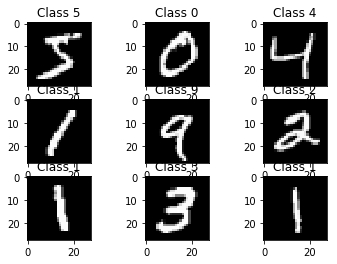

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_org[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train_org[i]))

In [5]:
x_train_org = x_train_org.reshape(60000, 784) / 255.
x_test_org = x_test_org.reshape(10000, 784) / 255.

x_train = x_train_org[:50000]
y_train = to_categorical(y_train_org[:50000], num_classes)
x_valid = x_train_org[50000:]
y_valid = to_categorical(y_train_org[50000:], num_classes)

x_test = x_test_org
y_test = to_categorical(y_test_org)

print('x_train shape: {} // y_train.shape: {}'.format(x_train.shape, y_train.shape))
print('x_valid shape: {} // y_valid.shape: {}'.format(x_valid.shape, y_valid.shape))

x_train shape: (50000, 784) // y_train.shape: (50000, 10)
x_valid shape: (10000, 784) // y_valid.shape: (10000, 10)


# Construct model architecture

In [6]:
def myDNN():
    img_input = Input(shape=(784,))
    fc1 = Dense(512, activation='relu', name='fc1')(img_input)
    do1 = Dropout(0.2, name='do1')(fc1)
    fc2 = Dense(512, activation='relu', name='fc2')(do1)
    do2 = Dropout(0.2, name='do2')(fc2)
    fc3 = Dense(num_classes, activation='softmax', name='fc3')(do2)

    model = Model(img_input, fc3)
    
    return model

In [7]:
model = myDNN()
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

ckpt = ModelCheckpoint('DNN_model_e{epoch:02d}', # DNN_model_e{epoch:02d}_a{val_acc:.4f}
                       monitor='val_acc',
                       save_best_only=False,
                       save_weights_only=True,
                       verbose=1)
cb = [ckpt]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
do1 (Dropout)                (None, 512)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
do2 (Dropout)                (None, 512)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Start to train DNN model

In [8]:
epochs = 20
batch_size = 256

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_valid, y_valid),
                    callbacks=cb,
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 92us/step - loss: 0.8804 - acc: 0.7658 - val_loss: 0.3098 - val_acc: 0.9165

Epoch 00001: saving model to DNN_model_e01
Epoch 2/20
50000/50000 [==============================] - 4s 88us/step - loss: 0.3348 - acc: 0.9040 - val_loss: 0.2265 - val_acc: 0.9366

Epoch 00002: saving model to DNN_model_e02
Epoch 3/20
50000/50000 [==============================] - 4s 89us/step - loss: 0.2606 - acc: 0.9254 - val_loss: 0.1873 - val_acc: 0.9486

Epoch 00003: saving model to DNN_model_e03
Epoch 4/20
50000/50000 [==============================] - 4s 88us/step - loss: 0.2155 - acc: 0.9378 - val_loss: 0.1628 - val_acc: 0.9548

Epoch 00004: saving model to DNN_model_e04
Epoch 5/20
50000/50000 [==============================] - 4s 89us/step - loss: 0.1851 - acc: 0.9461 - val_loss: 0.1462 - val_acc: 0.9588

Epoch 00005: saving model to DNN_model_e05
Epoch 6/20
50000/50000 [=====================

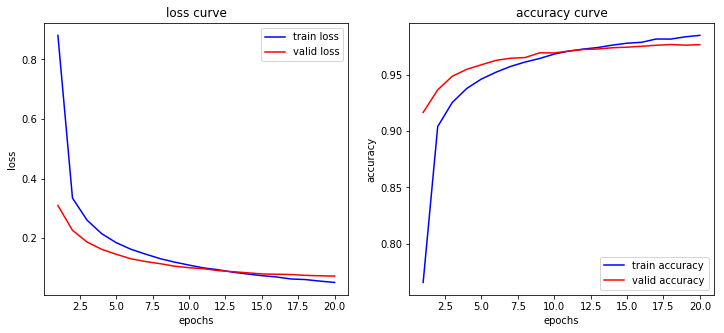

In [9]:
l = history.history['loss']
vl = history.history['val_loss']
acc = history.history['acc']
vacc = history.history['val_acc']

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(np.arange(epochs)+1, l, 'b', label='train loss')
plt.plot(np.arange(epochs)+1, vl, 'r', label='valid loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss curve")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(np.arange(epochs)+1, acc, 'b', label='train accuracy')
plt.plot(np.arange(epochs)+1, vacc, 'r', label='valid accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy curve")
plt.legend(loc='best')

plt.show()

# Evaluate model on the test dataset

In [10]:
model_name = 'DNN_model_e20'
model.load_weights(model_name)

# prediction = model.predict(x_test)
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Testing accuracy: {}'.format(accuracy))

Testing accuracy: [0.06871505109814462, 0.9789]
